In [1]:
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path

In [2]:
mcfile_path = "../../.././dijet_pythia_mc16A.root"
mcfile = uproot.open(mcfile_path)["Reweighting_Quark_Factor"]

In [3]:
pt = 500
var = 'ntrk' 
label_pt = ["LeadingJet", "SubLeadingJet"]
label_eta = ["Forward", "Central"]
label_type = ["Gluon", "Quark", "B_Quark", "C_Quark"]

In [4]:
HistMap = {}
for i, l_pt  in enumerate(label_pt):
    for j, l_eta in enumerate(label_eta):
        for k, l_type in enumerate(label_type):
            key = str(pt) + "_" + l_pt + "_" + l_eta + "_" + l_type + "_" + var
            HistMap[key] = mcfile[key].to_numpy()


In [5]:
## Construct data-like MC 
Forward = np.zeros((60))
Central = np.zeros((60))
for k, v in HistMap.items():
    if k.__contains__('Forward'):
        Forward += v[0]
    elif k.__contains__('Central'):
        Central += v[0]

In [6]:
## Construct pure Quark vs Gluon 
Quark = np.zeros((60))
Gluon = np.zeros((60))
for k, v in HistMap.items():
    if k.__contains__('Quark'):
        Quark += v[0]
    elif k.__contains__('Gluon'):
        Gluon += v[0]

In [7]:
Forward_Quark = np.zeros((60))
Forward_Gluon = np.zeros((60))
Central_Quark = np.zeros((60))
Central_Gluon = np.zeros((60))

for k, v in HistMap.items():
    if k.__contains__('Quark') and k.__contains__('Forward'):
        Forward_Quark += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Forward'):
        Forward_Gluon += v[0]
    elif k.__contains__('Quark') and k.__contains__('Central'):
        Central_Quark += v[0]
    elif k.__contains__('Gluon') and k.__contains__('Central'):
        Central_Gluon += v[0]

In [8]:
frac_Forward_Quark = np.sum(Forward_Quark) / np.sum(Forward)
frac_Central_Quark = np.sum(Central_Quark) / np.sum(Central)

frac_Forward_Gluon = 1 - frac_Forward_Quark
frac_Central_Gluon = 1 - frac_Central_Quark

In [9]:
f = np.array([[frac_Forward_Quark,  frac_Forward_Gluon], [frac_Central_Quark, frac_Central_Gluon]])
print(f)
f_inv = np.linalg.inv(f)

[[0.57429781 0.42570219]
 [0.40450069 0.59549931]]


In [10]:
# normalize 
p_Q = Quark / np.sum(Quark)
p_G = Gluon / np.sum(Gluon)

p_H = Forward / np.sum(Forward)
p_L = Central / np.sum(Central)

p_H_Q = Forward_Quark / np.sum(Forward_Quark)
p_L_Q = Central_Quark / np.sum(Central_Quark)
p_H_G = Forward_Gluon / np.sum(Forward_Gluon)
p_L_G = Central_Gluon / np.sum(Central_Gluon)


extract_p_Q = f_inv[0][0] * p_H + f_inv[0][1]* p_L 
extract_p_G = f_inv[1][0] * p_H + f_inv[1][1]* p_L 


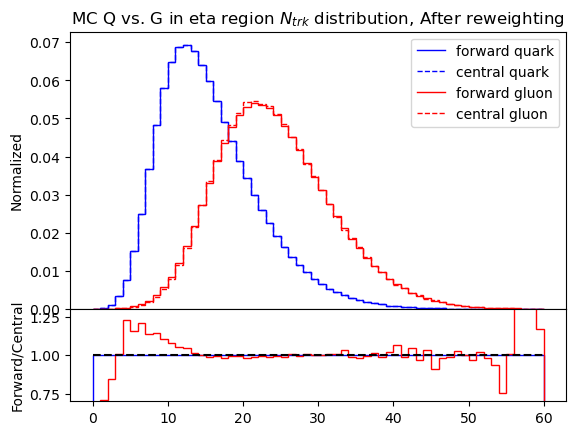

In [11]:
bin_edges = np.linspace(0,60,61)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

ax0.stairs(values = p_H_Q, edges = bin_edges, color = 'blue', label = 'forward quark')
ax0.stairs(values = p_L_Q, edges = bin_edges,  color = 'blue', linestyle='--', label = 'central quark' )

ax0.stairs(values = p_H_G, edges = bin_edges, color = 'red', label = 'forward gluon')
ax0.stairs(values = p_L_G, edges = bin_edges, color = 'red', linestyle='--', label = 'central gluon' )

ax0.set_ylabel("Normalized")
ax0.legend()
ax0.set_title(r"MC Q vs. G in eta region $N_{trk}$ distribution, After reweighting")

ax1.stairs(values = p_H_Q/p_L_Q, edges = bin_edges, color = 'blue')
ax1.stairs(values = p_H_G/p_L_G, edges = bin_edges, color = 'red')
ax1.set_ylabel("Forward/Central")
ax1.set_ylim(0.7, 1.3)
ax1.hlines(y = 1, xmin = 0, xmax = 60, color = 'black', linestyle = '--')

ax1.plot()
plt.savefig("MC_truth_Q_G_eta_ntrk_after_reweighting.jpg", dpi=300)
plt.show()

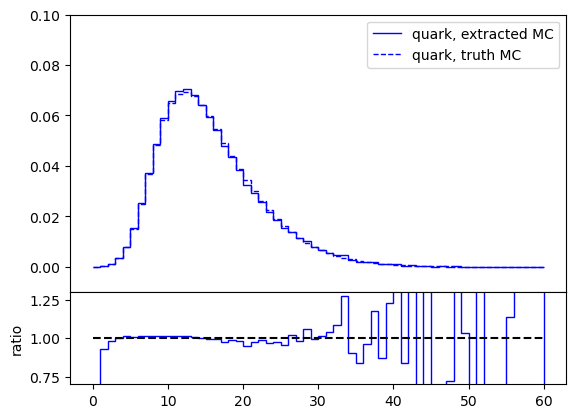

In [12]:
bin_edges = np.linspace(0,60,61)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})
ax0.stairs(values = extract_p_Q, edges = bin_edges, color = 'blue', label = 'quark, extracted MC')
ax0.stairs(values = p_Q, edges = bin_edges, color='blue', linestyle='--', label = 'quark, truth MC')
ax0.legend()
ax0.set_ylim(-0.01, 0.1)

ax1.stairs(values = extract_p_Q/p_Q , edges=bin_edges, color = 'blue')
ax1.set_ylim(0.7,1.3)
ax1.set_ylabel("ratio")
ax1.hlines(y = 1, xmin = 0, xmax = 60, color = 'black', linestyle = '--')
fig.savefig("MCclosure_extracted_quark_ntrk.jpg", dpi=300)

fig.show()

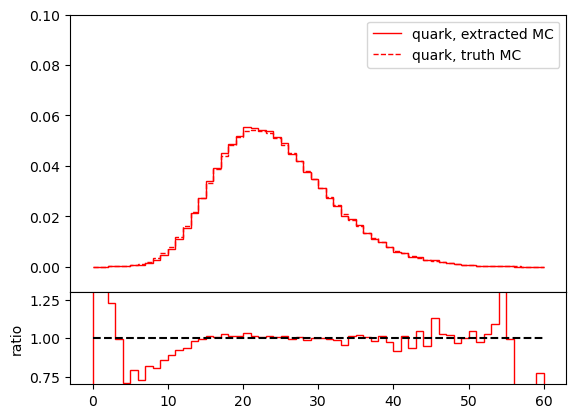

In [13]:
bin_edges = np.linspace(0,60,61)
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})
ax0.stairs(values = extract_p_G, edges = bin_edges, color = 'red', label = 'quark, extracted MC')
ax0.stairs(values = p_G, edges = bin_edges, color='red', linestyle='--', label = 'quark, truth MC')
ax0.legend()
ax0.set_ylim(-0.01, 0.1)

ax1.stairs(values = extract_p_G/p_G , edges=bin_edges, color = 'red')
ax1.set_ylim(0.7,1.3)
ax1.set_ylabel("ratio")
ax1.hlines(y = 1, xmin = 0, xmax = 60, color = 'black', linestyle = '--')
fig.savefig("MCclosure_extracted_gluon_ntrk.jpg", dpi=300)

fig.show()